# Lista 5

### Algorytmy i struktury danych

#### Urszula Spik i Natalia Jelito

In [70]:
import turtle as trtl
import numpy as np
from scipy import linalg
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### <span style="color:CornflowerBlue"> Zadanie 1 </span>

**Edycja świąteczna**

In [71]:
def solving_time(n):
    """
    Find time of solving system of linear equations
    
    Args:
        n (int): size of matrix
        
    Returns:
        (float): time of solving
    """
    a = np.random.randint(low = -50, high = 50, size = (n, n))
    b = np.random.randint(low = -50, high = 50, size = n)
    t = time.time() 
    x = linalg.solve(a, b)
    t = time.time() - t
    return t
  

Stwórzmy wykresy dla różnych rozmiarów macierzy

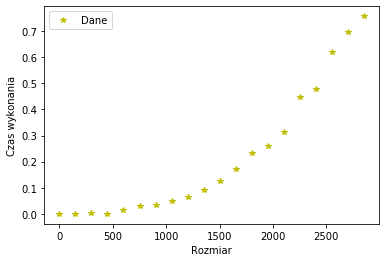

In [73]:
n = 3000
x = list(range(0,n, 150))
y = [solving_time(i) for i in x]
plt.plot(x,y, "y*", label="Dane")
plt.xlabel("Rozmiar")
plt.ylabel("Czas wykonania")
plt.legend(loc='upper left')
plt.show()

Stawiam hipoteze, że wykres jest proporcjonalny do $x^2$

Wyliczmy wartość współczynników a i b dla funkcji $ax^2 +b$

In [74]:
def func(x, a, b):
    """
    Function that give value of square function
    
    Returns:
        Value of square function
    """
    return a*x**2 + b

popt, pcov = curve_fit(func, x, y) 

print("Wartości współczynników: a = %s , b = %s" % (popt[0], popt[1]))

Wartości współczynników: a = 9.432184177063781e-08 , b = -0.04234239615074446


Porównajmy wykres naszych danych z szacowaną funkcją

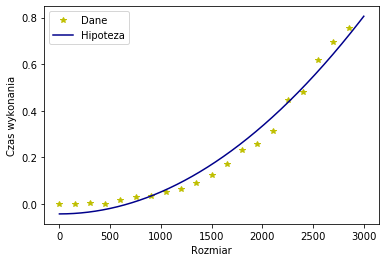

In [75]:
x2 = np.arange(0,n)
plt.plot(x,y,'y*',label="Dane")
plt.plot(x2, func(x2, popt[0], popt[1]), color="darkblue", label="Hipoteza") 
plt.xlabel("Rozmiar")
plt.ylabel("Czas wykonania")
plt.legend(loc='upper left')
plt.show()

Algorytm ma złożoność obliczeniową $O(N^2)$ ;)

### <span style="color:CornflowerBlue"> Zadanie 2 </span>

In [76]:
class Stack:
    def __init__(self, name = "Stack"):
        """
        Create stack
        
        Args:
            name (str): name of stack
        """
        self.items = []
        self.name = name
        
    def isEmpty(self):
        """
        Check if stack is empty

        Returns:
            (bool): True if stack is empty, otherwise False
        """
        return self.items == []
    
    def push(self, item):
        """
        Add item to the end

        Args:
            item: item to add
        """
        self.items.append(item)
        
    def pop(self):
        """
        Delate last item

        Returns:
            Delated item
        """
        return self.items.pop()
    
    def peek(self):
        """
        Return last item
        
        Returns:
            Last item
        """
        return self.items[len(self.items)-1]
    
    def size(self):
        """
        Check size of stack
        
        Returns:
            (int): Size of stack
        """
        return len(self.items)
    
    def __str__(self):
        """
        Show str form of stack
        
        Returns:
            (str): str from stack
        """
        return str(self.items)

In [77]:
def move_disc(source, destination):
    """Move the next disk from source to target

    Args:
        source (Stack): tower to take a disk from
        destination (Stack): tower where we put a disk
    """
    destination.push(source.pop())
    src_name = source.name
    dst_name = destination.name
    print(f"moving disk form {src_name} to {dst_name}")

def hanoi_stack(n, A, C, B):
    """Solves hanoi tower using 3 stacks
    Args:
        n (int): number of disks
        A (Stack): source stack
        C (Stack): stack where we want to move disks (destiantion)
        B (Stack): auxiliary stack
    """
    if n > 0:
        hanoi_stack(n-1, A, B,C)
        move_disc(A,C)
        hanoi_stack(n-1, B, C, A)

In [78]:
def hanoi_tower(n, A_name="A", C_name="C", B_name="B"):
    """Shows procces of solving problem of hanoi tower using 3 stacks

    Args:
        n (int): number of disks
        A_name (str): name of source stack
        C_name (str): name of stack where we want to move disks(destination)
        B_name (str): name of auxiliary stack
    """
    A = Stack(A_name)
    B = Stack(B_name)
    C = Stack(C_name)
    for i in range(n, 0 , -1):
        A.push(i)
    print(f'{A_name}:{A}, {B_name}:{B}, {C_name}:{C}')
    hanoi_stack(n, A, C, B)
    print(f'{A_name}:{A}, {B_name}:{B}, {C_name}:{C}')

n = 4
hanoi_tower(n)

A:[4, 3, 2, 1], B:[], C:[]
moving disk form A to B
moving disk form A to C
moving disk form B to C
moving disk form A to B
moving disk form C to A
moving disk form C to B
moving disk form A to B
moving disk form A to C
moving disk form B to C
moving disk form B to A
moving disk form C to A
moving disk form B to C
moving disk form A to B
moving disk form A to C
moving disk form B to C
A:[], B:[], C:[4, 3, 2, 1]


W wieży Hanoi wiemy, że najmniejsza liczba wymaganych ruchów wynosi $2^n -1$, co w podanym przykładzie dla $n=4$ widzimy, że się zgadza :)

**<span style="color:crimson">Ważne!</span>**

*W jupyterze przy zadaniach z turtle może pojawić się błąd Terminator, w tym wypadku należy po prostu uruchomić ponownie kod i wszystko będzie ok, kod uruchomiony w VS Codzie działa bez problemu :)*

### <span style="color:CornflowerBlue"> Zadanie 3 </span>

In [79]:
def hilbert_curve(n, angle, length):
    """
    Generates Hilbert curve

    Args:
        n (int): number of recursion steps
        angle (int): value of turn
        length (int): length of element
    """
    if n==0:
        return
    trtl.right(angle)
    hilbert_curve(n - 1, -angle, length)
    trtl.forward(length)
    trtl.left(angle)
    hilbert_curve(n - 1, angle, length)
    trtl.forward(length)
    hilbert_curve(n - 1, angle, length)
    trtl.left(angle)
    trtl.forward(length)
    hilbert_curve(n - 1, -angle, length)
    trtl.right(angle)

In [80]:
def hilbert_pattern(n, size = 200, angle = 90):
    """Draws Hilbert curve

    Args:
        n (int): number of recursion steps
        size (int, optional): size of pattern. Defaults to 200.
        angle (int, optional): value of turn. Defaults to 90.
    """
    trtl.Screen().bgcolor("midnightblue")
    trtl.pencolor("lemonchiffon")
    trtl.penup()
    trtl.goto(-size / 2.0, size / 2.0)
    trtl.pendown()
    trtl.speed(10)
    hilbert_curve(n, angle, size / ((2 ** n - 1)+1))
    trtl.mainloop()

In [81]:
n = 5
hilbert_pattern(n)

### <span style="color:CornflowerBlue"> Zadanie 4 </span>

Krzywa Kocha

In [82]:
def kochcurve(n, length = 300):
    """
    Create Koch curve
    
    Args:
        length (int): lenght of curve, positive int
        n (int): number of recursion steps, 
        must be greater than or equal to 0
    """
    if n == 0:
        trtl.forward(length)
    else:
        length /= 3.0
        kochcurve(n-1, length)
        trtl.left(60)
        kochcurve(n-1, length)
        trtl.right(120)
        kochcurve(n-1, length)
        trtl.left(60)
        kochcurve(n-1, length)

def kochsnoflake(n, length = 300):
    """
    Draw Koch Snowflake
    
    Args:
        length (int): lenght of curve, positive int
        n (int): number of recursion steps,
        must be greater than or equal to 0
    """
    screen = trtl.Screen()
    screen.bgcolor("midnightblue")
    screen.title("Merry Christmas!")
    trtl.shape("turtle")
    trtl.speed(0)
    trtl.pencolor("white")                             
    trtl.penup()                     
    trtl.setposition(-length/2.0, length/3.0)    
    trtl.pendown()
    trtl.fillcolor("white")
    trtl.begin_fill()
    for i in range(3):    
        kochcurve(n, length)
        trtl.right(120)
    trtl.end_fill() 
    trtl.hideturtle()
    trtl.exitonclick()

In [84]:
kochsnoflake(3)

### <span style="color:DarkRed"> Wesołych Świąt! </span>